In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ABS_PATH = os.path.abspath("")
IMG_PATH = os.path.join(ABS_PATH, "images")

frames = [plt.imread(os.path.join(IMG_PATH, fname)) for fname in os.listdir(IMG_PATH) if fname.endswith(".jpg") or fname.endswith(".png")]

In [3]:
def local_operator(frame, kernel_size, function):
    
    k, n = kernel_size[0]//2, kernel_size[1]//2
    res_frame = np.zeros_like(frame)
    padded_frame = np.zeros(shape=(frame.shape[0]+2*k, frame.shape[1]+2*n, frame.shape[2]))
    padded_frame[k:-k, n:-n] = frame

    for c in range(padded_frame.shape[2]):
        for i in range(k, padded_frame.shape[0]-k):
            for j in range(n, padded_frame.shape[1]-n):
                curr_frame = padded_frame[i-k:i+k+1,j-n:j+n+1, c]
                res_frame[i-k,j-n, c] = function(curr_frame)
    return res_frame

In [4]:
def distance_transform(frame):
    frame_distances = []

    while frame.sum()>0:
        frame = local_operator(frame=frame, kernel_size=(3,3), function=lambda x: x.min())
        frame_distances.append(frame)

    return np.array(frame_distances).sum(axis=0)


In [57]:
def skeletonize(frame):

    def skeletonize_function(frame):
        frame = frame*kernel
        if frame.sum()==4:
            return 1
        else: 
            return 0
        
    def skeletonize_function_mean(frame):
        for x in kernels: frame = frame*x
        if frame.sum()>0:
            return frame.mean()
        else: 
            return 0
        
    base = np.array([1]*6 + [-1]*3).reshape(3,3)
    base[1,0], base[1,2] = 0, 0
    base2 = np.array([-1]*4+ [1]*5).reshape(3,3)
    base2[0,2], base2[2,0] = 0, 0 

    kernels = [base, base.T, np.flip(base), np.flip(base.T), base2, np.flip(base2,1).T, np.flip(base2,1), np.flip(base2,1).T, np.flip(base2)]
    
    frame = np.where(frame>0, 1, 0)
    for _ in range(30):
        for kernel in kernels:
            frame -= local_operator(frame, kernel_size=(3,3), function=skeletonize_function)
            # frame_new = local_operator(frame, kernel_size=(3,3), function=skeletonize_function)
    return frame

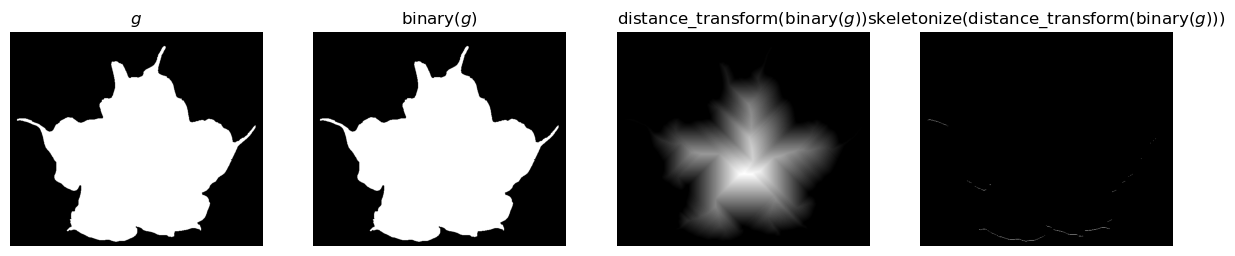

In [6]:
def binary(frame):
    frame *= 255/frame.max()
    return np.where(frame>150, True, False)

frame =  frames[0]
frame = frame.reshape(*frame.shape[:2], 1)


imgs = [frame]
for func in [binary, distance_transform, skeletonize]:
    frame = func(frame)
    imgs.append(frame)


fig, axes = plt.subplots(1, 4, figsize=(15,5))
titles = [r"$g$", r"binary$(g)$", r"distance_transform$($binary$(g))$", r"skeletonize$($distance_transform$($binary$(g)))$"]

for ax, t, x in zip(axes, titles, imgs):
    ax.imshow(x, cmap="gray")
    ax.set_title(t)
    ax.axis("off");

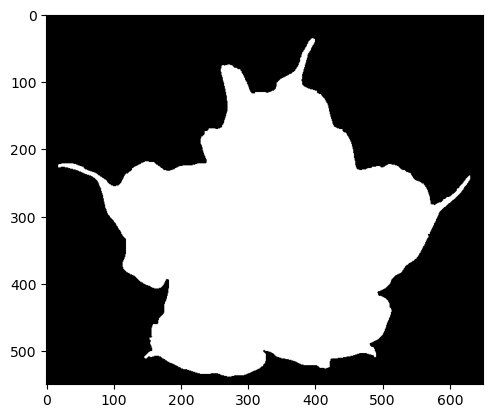

In [7]:
plt.imshow(imgs[0], cmap="gray")

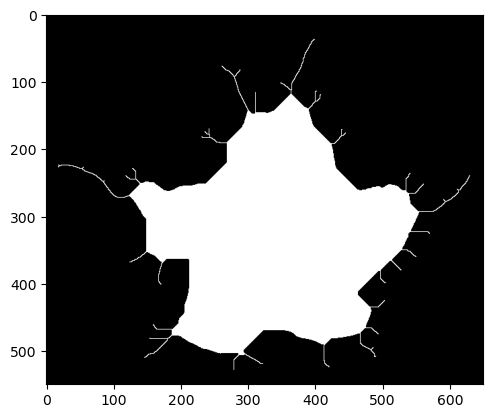

In [58]:
plt.imshow(skeletonize(imgs[0]), cmap="gray")